In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Analysis

In [2]:
detention_DS = pd.read_csv('total_fail_19_20.csv')
TypeDet = list(pd.unique(detention_DS['TypeDetention']))
TypeMod = list(pd.unique(detention_DS['FailMode']))
TypeEqu = list(pd.unique(detention_DS['Equipment']))

In [3]:
#pd.DataFrame([TypeDet, TypeMod, TypeEqu], index=['TypeDetention', 'FailMode', 'Equipment'], columns=range(1, len(TypeMod)+1))

## 01 Evaluation the Period (use mask)
* Between start and finish work shift

In [4]:
mask_01 = (detention_DS['Start'] >= '2019-01-01 08:00:00') & (detention_DS['Start'] <= '2020-01-01 08:00:00')
detention_DS = detention_DS.loc[mask_01]

## 02 Replace Names Data Type for Numbers:
* TypeDetention, Ex: external O: Operation MN: Mechanical INST: Instrumentation EN: Electrical DC: Control MP: Preventive Maintenance
* Fail Mode and Equipment 

In [5]:
detention_DS['TypeDetention'] = detention_DS['TypeDetention'].replace(TypeDet, range(1, len(TypeDet)+1))
detention_DS['FailMode'] = detention_DS['FailMode'].replace(TypeMod, range(1, len(TypeMod)+1))
detention_DS['Equipment'] = detention_DS['Equipment'].replace(TypeEqu, range(1, len(TypeEqu)+1))

## 03 Evaluation the Work Shift

In [6]:
variable = ['FailMode', 'Equipment']

### i. Operation

Text(0.5, 0.98, 'Relation between Operation Work Shift')

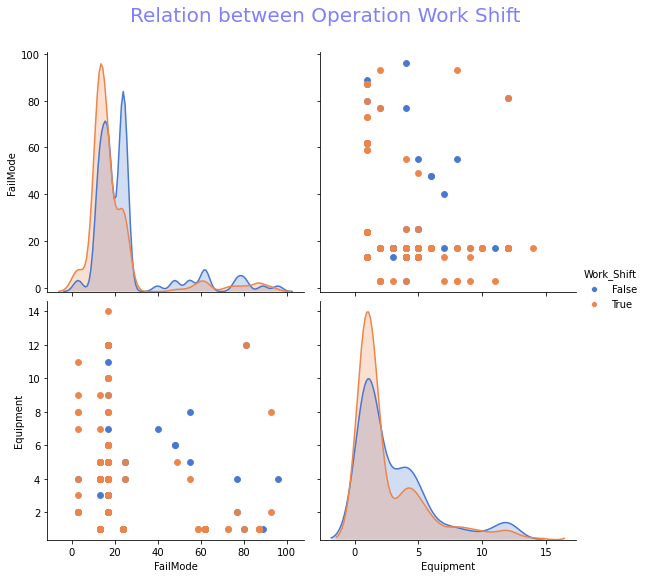

In [7]:
Operation = detention_DS[detention_DS['TypeDetention'] == 2] # Operation Group

#Create a pairplot(plot across different attributes)
a=sns.pairplot(Operation, hue='Work_Shift' ,palette="muted",height=4,vars=variable,kind='scatter',markers=['o','o'])

#Change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#Remove the top and the right lines
sns.despine()

#Additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#Set the title of the graph
a.fig.suptitle('Relation between Operation Work Shift',fontsize=20,color='b',alpha=0.5)

In [8]:
Operation_A = Operation[Operation['Work_Shift'] == True] 
Operation_B = Operation[Operation['Work_Shift'] == False]

Oper_time_A = Operation_A['Hour'].sum()
Oper_time_B = Operation_B['Hour'].sum()

'{0:.2f}%'.format((1-(Oper_time_B / Oper_time_A)) * 100)

'43.32%'

In [9]:
Count_Failure_Op_A = Operation_A['Hour'].count()
Count_Failure_Op_B = Operation_B['Hour'].count()

(Count_Failure_Op_A, Count_Failure_Op_B)

(210, 99)

### ii. Electrical and Instrumentation

Text(0.5, 0.98, 'Relation between Electrical and Instrumentation Work Shift')

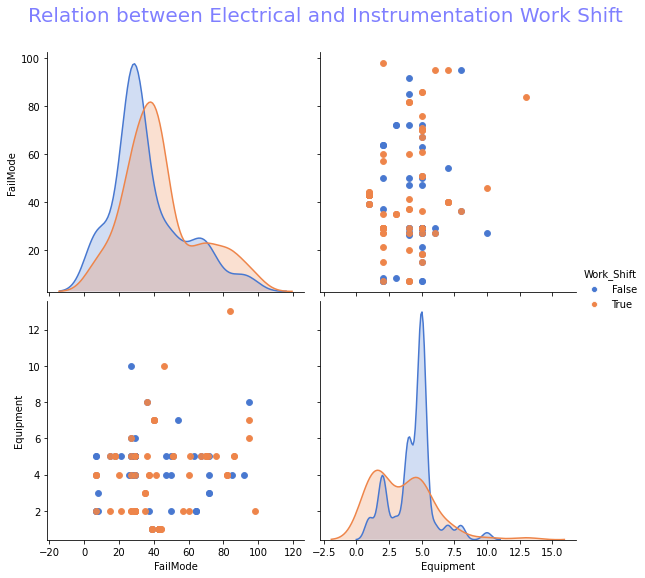

In [10]:
Elect_Inst = detention_DS[(detention_DS['TypeDetention'] == 4) | (detention_DS['TypeDetention'] == 5)] # Electric and Instrumental

#Create a pairplot(plot across different attributes)
a=sns.pairplot(Elect_Inst, hue='Work_Shift' ,palette="muted",height=4,vars=variable,kind='scatter',markers=['o','o'])

#Change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#Remove the top and the right lines
sns.despine()

#Additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#Set the title of the graph
a.fig.suptitle('Relation between Electrical and Instrumentation Work Shift',fontsize=20,color='b',alpha=0.5)

In [11]:
Elect_Inst_A = Elect_Inst[Elect_Inst['Work_Shift'] == True] 
Elect_Inst_B = Elect_Inst[Elect_Inst['Work_Shift'] == False]

Elect_Inst_time_A = Elect_Inst_A['Hour'].sum()
Elect_Inst_time_B = Elect_Inst_B['Hour'].sum()

'{0:.2f}%'.format((1-(Elect_Inst_time_B / Elect_Inst_time_A)) * 100)

'-1.81%'

In [12]:
Count_Failure_El_A = Elect_Inst_A['Hour'].count()
Count_Failure_El_B = Elect_Inst_B['Hour'].count()

(Count_Failure_El_A, Count_Failure_El_B)

(82, 68)

### iii. Evaluation of failures

Text(0.5, 0.98, 'Relation between All Failures Work Shift')

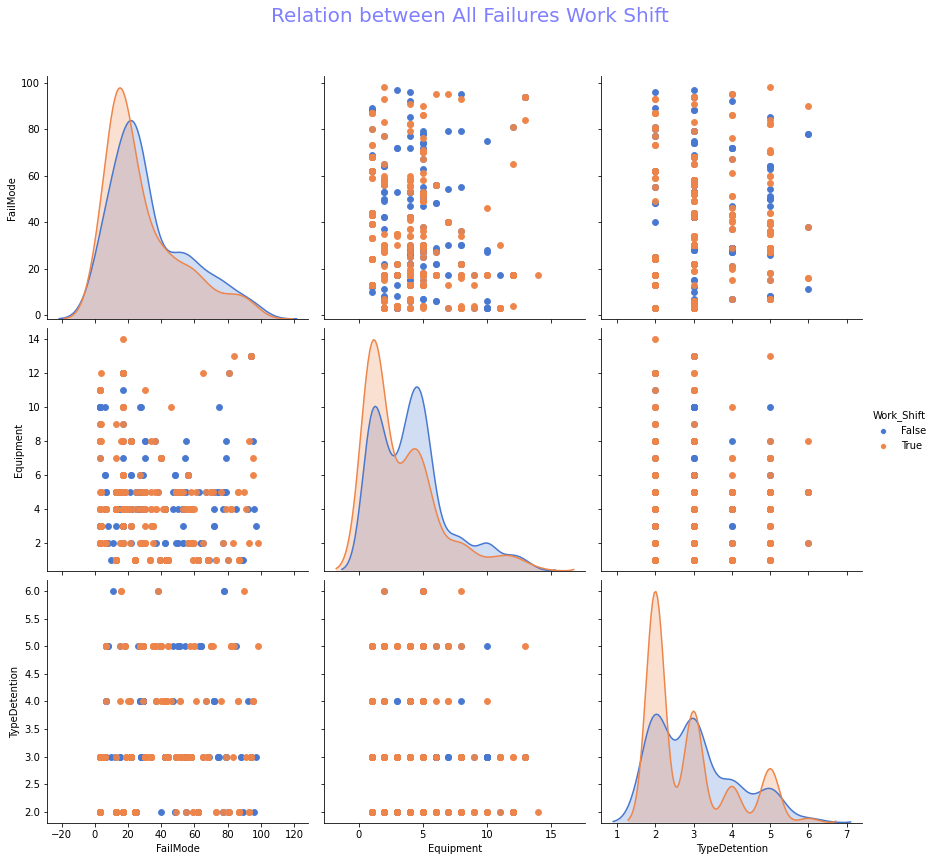

In [13]:
Failures = detention_DS[(detention_DS['TypeDetention'] != 1) & (detention_DS['TypeDetention'] != 7)] #only failure & (detention_DS['TypeDetention'] != 2) 

#Create a pairplot(plot across different attributes)
a=sns.pairplot(Failures, hue='Work_Shift' ,palette="muted",height=4,vars=variable+['TypeDetention'],kind='scatter',markers=['o','o'])

#Change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#Remove the top and the right lines
sns.despine()

#Additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#Set the title of the graph
a.fig.suptitle('Relation between All Failures Work Shift',fontsize=20,color='b',alpha=0.5)

In [14]:
Failures_A = Failures[Failures['Work_Shift'] == True] 
Failures_B = Failures[Failures['Work_Shift'] == False]

Failures_time_A = Failures_A['Hour'].sum()
Failures_time_B = Failures_B['Hour'].sum()

'{0:.2f}%'.format((1-(Failures_time_B / Failures_time_A)) * 100)

'2.95%'

In [15]:
Failures_time_A, Failures_time_B

(258.85383333333334, 251.22023333333334)

In [16]:
Count_Failures_A = Failures_A['Hour'].count()
Count_Failures_B = Failures_B['Hour'].count()

(Count_Failures_A, Count_Failures_B)

(397, 265)

### iv. Bars Plot Comparation

In [19]:
labels = ['TTD Operation Workers', 'AD Operation Workers', 'TTD Electrical Workers', 'AD Electrical Workers']
team_A = [Oper_time_A, Count_Failure_Op_A, Elect_Inst_time_A, Count_Failure_El_A]
team_B = [Oper_time_B, Count_Failure_Op_B, Elect_Inst_time_B, Count_Failure_El_B]

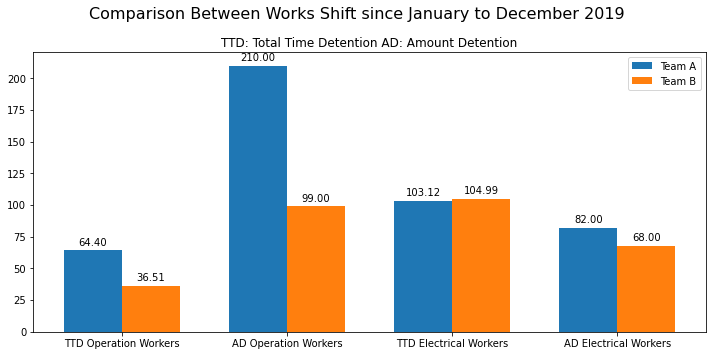

In [20]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.rcParams['figure.figsize'] = (10, 5)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, team_A, width, label='Team A')
rects2 = ax.bar(x + width/2, team_B, width, label='Team B')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.suptitle('Comparison Between Works Shift since January to December 2019', size=16)
ax.set_title('TTD: Total Time Detention AD: Amount Detention')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()